In [1]:
import json
from tqdm import tqdm

sft_output_lens = []
avg_output_len = 0
with (open("model_outputs/sft.jsonl", "r") as sft_file):
    sft_data = list(sft_file)
    for i in tqdm(range(1000)):
        sft_json = json.loads(sft_data[i])
        current_len = len(sft_json["response"].strip())
        sft_output_lens.append(current_len)
        avg_output_len += current_len/1000.0
print(avg_output_len)

100%|██████████| 1000/1000 [00:00<00:00, 113469.97it/s]

572.9670000000006


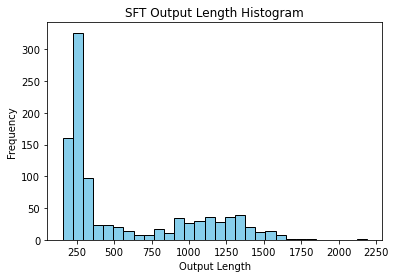

In [2]:
import matplotlib.pyplot as plt
import numpy as np
 
# Plotting a basic histogram
plt.hist(sft_output_lens, bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Output Length')
plt.ylabel('Frequency')
plt.title('SFT Output Length Histogram')
 
# Display the plot
plt.savefig("eval_results/sft_output_lengths.jpeg")
plt.show()

In [3]:
import json
from tqdm import tqdm

dpo_output_lens = []
avg_output_len = 0
with (open("model_outputs/dpo.jsonl", "r") as dpo_file):
    dpo_data = list(dpo_file)
    for i in tqdm(range(1000)):
        dpo_json = json.loads(dpo_data[i])
        current_len = len(dpo_json["response"].strip())
        dpo_output_lens.append(current_len)
        avg_output_len += current_len/1000.0
print(avg_output_len)

100%|██████████| 1000/1000 [00:00<00:00, 114040.73it/s]

618.2310000000008


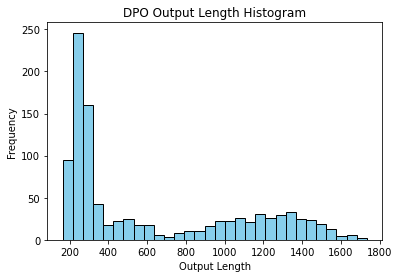

In [4]:
import matplotlib.pyplot as plt
import numpy as np
 
# Plotting a basic histogram
plt.hist(dpo_output_lens, bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Output Length')
plt.ylabel('Frequency')
plt.title('DPO Output Length Histogram')
 
# Display the plot
plt.savefig("eval_results/dpo_output_lengths.jpeg")
plt.show()

In [5]:
import json
from tqdm import tqdm

kto_output_lens = []
avg_output_len = 0
with (open("model_outputs/kto.jsonl", "r") as kto_file):
    kto_data = list(kto_file)
    for i in tqdm(range(1000)):
        kto_json = json.loads(kto_data[i])
        current_len = len(kto_json["response"].strip())
        kto_output_lens.append(current_len)
        avg_output_len += current_len/1000.0
print(avg_output_len)

100%|██████████| 1000/1000 [00:00<00:00, 93401.86it/s]

2046.6029999999996


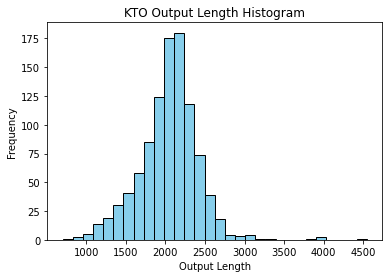

In [6]:
import matplotlib.pyplot as plt
import numpy as np
 
# Plotting a basic histogram
plt.hist(kto_output_lens, bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Output Length')
plt.ylabel('Frequency')
plt.title('KTO Output Length Histogram')
 
# Display the plot
plt.savefig("eval_results/kto_output_lengths.jpeg")
plt.show()

In [3]:
import json
from openai import OpenAI
client = OpenAI()
from tqdm import tqdm

system_mes = "You are mimicking a human rater who compares two summaries of a Reddit post provided to you, and chooses the better one as commanded by the user."

user_mes_beginning = """"Which of the following summaries does a better job of summarizing the most \
important points in the given forum post, without including unimportant or \
irrelevant details? A good summary is both precise and concise. A concise but inaccurate summary is unhelpful. \
Both summaries will typically be somewhat hard to parse and have many irrelevant or made-up statements. Choose the summary that is\
less full of gibberish and more relevant to the text.\n"""

user_mes_end = """FIRST provide a one-sentence comparison of the two summaries, explaining which \
you prefer and why. SECOND, on a new line, state only "A" or "B" to indicate your \
choice. Your response should use the format:
Comparison: <one-sentence comparison and explanation>
Preferred: <"A" or "B">"""

In [4]:
import numpy as np
from tqdm import tqdm
import json
pref_list = []
with (open("dpo.jsonl", "r") as dpo_file):
    with (open("sft.jsonl", "r") as sft_file):
        # with open("dpo_sft_comparisons.txt", "a") as dpo_sft_comparisons:
        if True:
            dpo_data = list(dpo_file)
            sft_data = list(sft_file)
            for i in tqdm(range(10)):
                dpo_json = json.loads(dpo_data[i])
                sft_json = json.loads(sft_data[i])
                user_mes = user_mes_beginning + dpo_json["query"] + "\nSummary A: " + dpo_json["response"] +\
                "\nSummary B: " + sft_json["response"] + "\n" + user_mes_end
                completion = client.chat.completions.create(model="gpt-4-turbo", 
                                                            messages=[{"role": "system", "content": system_mes},
                                                                      {"role": "user", "content": user_mes}]
                                                           )
                ans = completion.choices[0].message.content
                print(ans)
                # idx = ans.find("\nPreferred: ")
                # ans_val = ans[idx+12:]
                # print(ans_val,)
                # pref_list.append(ans_val)

 10%|█         | 1/10 [00:03<00:30,  3.37s/it]

Comparison: Summary A is preferred because while it is somewhat incoherent, it retains a vague connection to the original post's theme of relationship doubts, whereas Summary B is completely nonsensical and filled with gibberish irrelevant to the post.  
Preferred: A


 20%|██        | 2/10 [00:06<00:24,  3.03s/it]

Comparison: Both summaries are fraught with incoherence and poorly structured phrases; however, Summary B slightly edges out with marginally clearer context about potential consequences of living together and appears slightly more related to the original content.
Preferred: B


 30%|███       | 3/10 [00:09<00:21,  3.05s/it]

Comparison: Both summaries inaccurately represent the original post's content, which involves a woman in love with her male best friend who does not reciprocate her romantic feelings; however, Summary A is slightly better as it at least acknowledges mutual feelings, which can loosely relate to their strong friendship, unlike Summary B which incorrectly states a lack of love and only tolerance.
Preferred: A


 40%|████      | 4/10 [00:12<00:18,  3.09s/it]

Comparison: Summary A is more relevant and detailed about the situation and the original post's concerns regarding the neglect of the kitten by the roommate, whereas Summary B is overly vague and includes confusing phrases.
Preferred: A


 50%|█████     | 5/10 [00:18<00:20,  4.12s/it]

Comparison: Summary A is slightly clearer and more focused on the main issue of the girlfriend's jealousy and the poster's dilemma about spending time with high school friends, whereas Summary B is more confused and includes extraneous expressions like "Fuck it in case" and "You're welcome! THANKS!" which do not relate to the core issue described in the post.
Preferred: A


 60%|██████    | 6/10 [00:21<00:14,  3.66s/it]

Comparison: Both summaries contain jumbled and confusing phrases, but Summary B is marginally clearer as it sticks closer to the relationship and jealousy issues without veering off into completely unrelated topics such as "sexual solipsism."
Preferred: B


 70%|███████   | 7/10 [00:24<00:10,  3.62s/it]

Comparison: Summary B is preferable as it is more coherent and relevant to the original post's concerns about potential cheating, despite both summaries being convoluted and difficult to understand.
Preferred: B


 80%|████████  | 8/10 [00:31<00:09,  4.54s/it]

Comparison: Summary B is slightly clearer in conveying the central issue of the relationship concern, mentioning specifically the boyfriend's clinginess and lack of motivation, although both summaries are confusing and contain irrelevant details.  
Preferred: B


 90%|█████████ | 9/10 [00:33<00:03,  3.80s/it]

Comparison: Summary A better captures the essence of the original post concerning the guilt the poster feels when choosing friends over his girlfriend and his reaction to her response, though it includes some confusing additions; whereas Summary B introduces contradictory and irrelevant points that confuse the reader more.
Preferred: A


100%|██████████| 10/10 [00:37<00:00,  3.75s/it]

Comparison: Both summaries are filled with irrelevant and nonsensical details, but Summary B references putting one's face against the pillow which is vaguely closer to the original content about flipping over and pressing the face into the pillow, making it slightly more relevant than Summary A.  
Preferred: B


In [34]:
print(pref_list.count('A'))

16


In [13]:
with (open("dpo_sft_comparisons.txt", "r") as dpo_sft_file):
    print(dpo_sft_file.read().count("A")/1001.0)

0.5574425574425574


In [14]:
with (open("kto_sft_comparisons.txt", "r") as kto_sft_file):
    print(kto_sft_file.read().count("A")/1000.0)

0.413
